# MDS THESIS
## Random Forest

### 0. Setup

In [18]:
# Install required packages
!pip install seaborn
#%pip install -q pandas matplotlib numpy scikit-learn 
#%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [11]:
# Import packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
%matplotlib inline 
#to display matplotlib plots directly in the notebook

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import TimeSeriesSplit
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

### 0. Load data

In [8]:
# Import train
train = pd.read_csv('../Data/train_test/train_df.csv')
#train = pd.read_csv('Data/train_test/train_df.csv')

# Import test
test = pd.read_csv('../Data/train_test/test_df.csv')
#test = pd.read_csv('Data/train_test/test_df.csv')

### 1. Visualize features

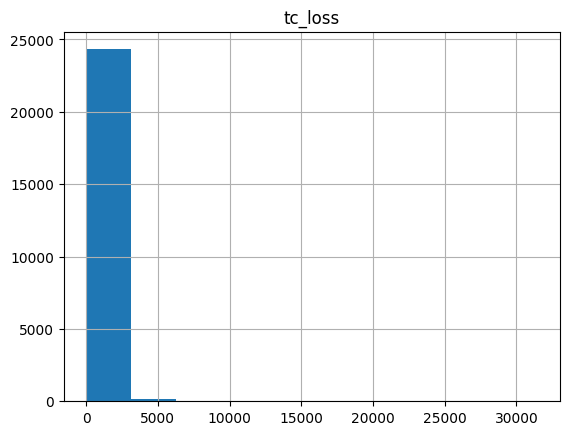

In [4]:
# Histporgram for each feature
viz = df[['tc_loss']]
viz.hist()
plt.show()

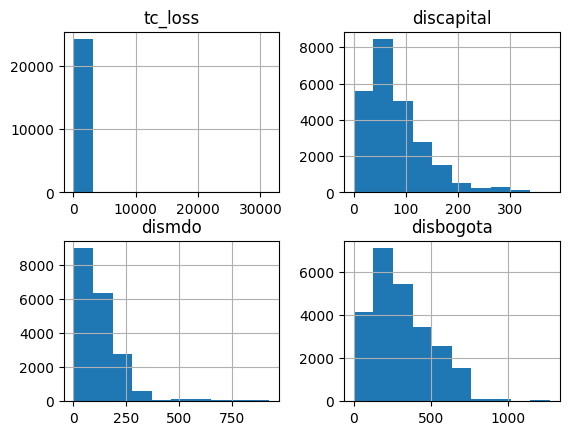

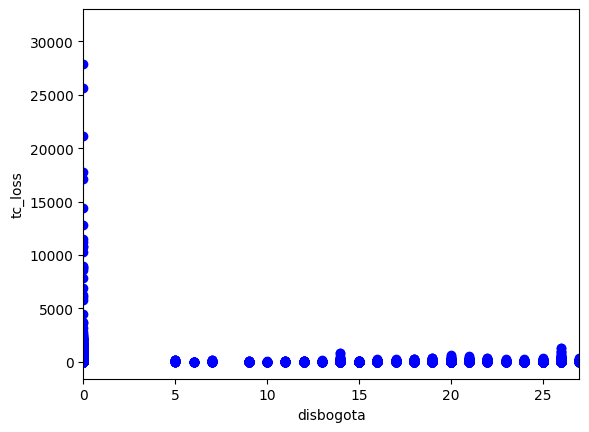

In [22]:
# Histporgram for each feature
viz = df[['tc_loss','discapital','dismdo','disbogota']]
viz.hist()
plt.show()

# Plot features vs Y
plt.scatter(df.discapital, df.tc_loss,  color='blue')
plt.xlabel("disbogota")
plt.ylabel("tc_loss")
plt.xlim(0,27)
plt.show()

### 2. Preprocess data

In [12]:
# y train and test
y_train = train['tc_loss_area']
y_test = test['tc_loss_area']

# Normalize output
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

# Convert to PyTorch tensors and send to GPU
#y_tensor_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_tensor_train = torch.tensor(y_train, dtype=torch.float32)
#y_tensor_test = torch.tensor(y_test, dtype=torch.float32).to(device)
y_tensor_test = torch.tensor(y_test, dtype=torch.float32)

In [14]:
# Get rid of columns that start with 'subnational1_' and 'cluster_' in train and test   
train1 = train.loc[:,~train.columns.str.startswith('subnational1_')]
train1 = train.loc[:,~train.columns.str.startswith('cluster_')]
test1 = test.loc[:,~test.columns.str.startswith('subnational1_')]
test1 = test.loc[:,~test.columns.str.startswith('cluster_')]

# X train and test
X_train1 = train1.drop(columns=['tc_loss_area', 'codmpio'])
X_test1 = test1.drop(columns=['tc_loss_area', 'codmpio'])

# Normalize features
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

# Convert to PyTorch tensors and send to GPU
#X_tensor_train = torch.tensor(X_train1, dtype=torch.float32).to(device)
X_tensor_train = torch.tensor(X_train1, dtype=torch.float32)
#X_tensor_test = torch.tensor(X_test1, dtype=torch.float32).to(device)
X_tensor_test = torch.tensor(X_test1, dtype=torch.float32)
#y_tensor_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_tensor_train = torch.tensor(y_train, dtype=torch.float32)
#y_tensor_test = torch.tensor(y_test, dtype=torch.float32).to(device)
y_tensor_test = torch.tensor(y_test, dtype=torch.float32)

### 4. Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train1, y_train.ravel())  # `ravel()` converts y_train to a 1D array if needed

# Make predictions
y_pred_train = rf_model.predict(X_train1)
y_pred_test = rf_model.predict(X_test1)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"Train MSE: {train_mse:.4f}, Train R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")


Train MSE: 0.0781, Train R²: 0.9219
Test MSE: 1.1683, Test R²: 0.0701


Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the parameter grid
param_dist = {
    "n_estimators": [100, 200, 300, 500],  # Number of trees
    "max_depth": [10, 20, 30, None],  # Max depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples in a leaf node
    "max_features": ["sqrt", "log2", None]  # Number of features considered per split
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Randomized Search Cross Validation
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=5, scoring="neg_mean_squared_error",
    verbose=2, n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train1, y_train.ravel())

# Best parameters found
print("Best Parameters:", random_search.best_params_)

# Best model
best_rf_model = random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


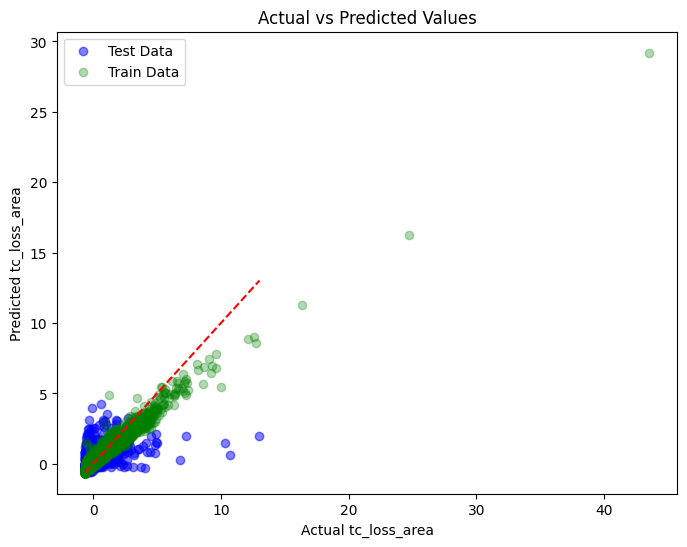

c:\Users\mmier\anaconda3\envs\MDS_thesis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


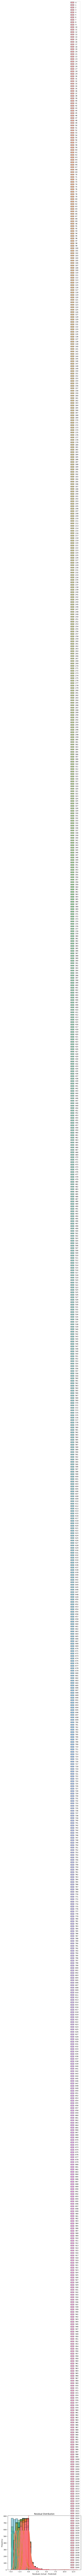

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert predictions back to their original scale (if needed)
y_pred_test = rf_model.predict(X_test1)
y_pred_train = rf_model.predict(X_train1)

## 1️⃣ Scatter Plot: Actual vs Predicted ##
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, label="Test Data", color='blue')
plt.scatter(y_train, y_pred_train, alpha=0.3, label="Train Data", color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ideal 1:1 line
plt.xlabel("Actual tc_loss_area")
plt.ylabel("Predicted tc_loss_area")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

## 2️⃣ Residual Plot (Error Analysis) ##
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred_test
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(0, color='red', linestyle='dashed')  # Line at zero error
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

## 3️⃣ Feature Importance Plot ##
feature_importances = rf_model.feature_importances_
feature_names = X_train1.columns  # Assuming X_train1 is a DataFrame

# Sort feature importances
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()
